In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings

from sklearn import preprocessing
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score

from xgboost import XGBRegressor
from xgboost import plot_importance

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from catboost import Pool

from scipy import stats
from scipy.stats import skew

from numpy import loadtxt
from matplotlib import pyplot

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
meal = pd.read_csv('data/meal_info.csv')
center = pd.read_csv('data/fulfilment_center_info.csv')

In [3]:
train=train.merge(center,on='center_id',how='left')
train=train.merge(meal,on='meal_id',how='left')

In [4]:
test=test.merge(center,on='center_id',how='left')
test=test.merge(meal,on='meal_id',how='left')

In [5]:
dataset =  pd.concat(objs=[train, test], axis=0,ignore_index=True)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

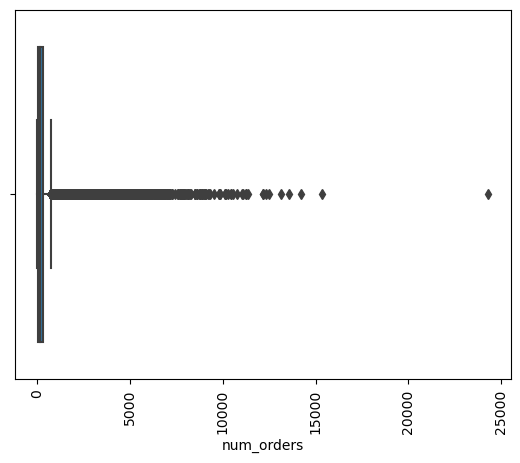

In [6]:
sns.boxplot(x='num_orders',data=dataset)
plt.xticks(rotation=90)

In [7]:
#outlier finder
outlier_num_ord = dataset[(dataset['num_orders']>20000)].index
#eliminate outlier
dataset.drop(outlier_num_ord,inplace = True)

In [8]:
meal_1885=dataset[dataset['meal_id']==1885].sort_values(by=["center_id",'week'], ascending=True)
meal_1993=dataset[dataset['meal_id']==1993].sort_values(by=["center_id",'week'], ascending=True)
meal_2539=dataset[dataset['meal_id']==2539].sort_values(by=["center_id",'week'], ascending=True)
meal_1248=dataset[dataset['meal_id']==1248].sort_values(by=["center_id",'week'], ascending=True)
meal_2631=dataset[dataset['meal_id']==2631].sort_values(by=["center_id",'week'], ascending=True)
meal_1311=dataset[dataset['meal_id']==1311].sort_values(by=["center_id",'week'], ascending=True)
meal_1062=dataset[dataset['meal_id']==1062].sort_values(by=["center_id",'week'], ascending=True)
meal_1778=dataset[dataset['meal_id']==1778].sort_values(by=["center_id",'week'], ascending=True)
meal_1803=dataset[dataset['meal_id']==1803].sort_values(by=["center_id",'week'], ascending=True)
meal_1198=dataset[dataset['meal_id']==1198].sort_values(by=["center_id",'week'], ascending=True)
meal_2707=dataset[dataset['meal_id']==2707].sort_values(by=["center_id",'week'], ascending=True)
meal_1847=dataset[dataset['meal_id']==1847].sort_values(by=["center_id",'week'], ascending=True)
meal_1438=dataset[dataset['meal_id']==1438].sort_values(by=["center_id",'week'], ascending=True)
meal_2494=dataset[dataset['meal_id']==2494].sort_values(by=["center_id",'week'], ascending=True)
meal_2760=dataset[dataset['meal_id']==2760].sort_values(by=["center_id",'week'], ascending=True)
meal_2490=dataset[dataset['meal_id']==2490].sort_values(by=["center_id",'week'], ascending=True)
meal_1109=dataset[dataset['meal_id']==1109].sort_values(by=["center_id",'week'], ascending=True)
meal_2290=dataset[dataset['meal_id']==2290].sort_values(by=["center_id",'week'], ascending=True)
meal_1525=dataset[dataset['meal_id']==1525].sort_values(by=["center_id",'week'], ascending=True)
meal_2704=dataset[dataset['meal_id']==2704].sort_values(by=["center_id",'week'], ascending=True)
meal_1878=dataset[dataset['meal_id']==1878].sort_values(by=["center_id",'week'], ascending=True)
meal_2640=dataset[dataset['meal_id']==2640].sort_values(by=["center_id",'week'], ascending=True)
meal_2577=dataset[dataset['meal_id']==2577].sort_values(by=["center_id",'week'], ascending=True)
meal_1754=dataset[dataset['meal_id']==1754].sort_values(by=["center_id",'week'], ascending=True)
meal_1971=dataset[dataset['meal_id']==1971].sort_values(by=["center_id",'week'], ascending=True)
meal_2306=dataset[dataset['meal_id']==2306].sort_values(by=["center_id",'week'], ascending=True)
meal_2139=dataset[dataset['meal_id']==2139].sort_values(by=["center_id",'week'], ascending=True)
meal_2826=dataset[dataset['meal_id']==2826].sort_values(by=["center_id",'week'], ascending=True)
meal_2664=dataset[dataset['meal_id']==2664].sort_values(by=["center_id",'week'], ascending=True)
meal_2569=dataset[dataset['meal_id']==2569].sort_values(by=["center_id",'week'], ascending=True)
meal_1230=dataset[dataset['meal_id']==1230].sort_values(by=["center_id",'week'], ascending=True)
meal_1207=dataset[dataset['meal_id']==1207].sort_values(by=["center_id",'week'], ascending=True)
meal_2322=dataset[dataset['meal_id']==2322].sort_values(by=["center_id",'week'], ascending=True)
meal_2492=dataset[dataset['meal_id']==2492].sort_values(by=["center_id",'week'], ascending=True)
meal_1216=dataset[dataset['meal_id']==1216].sort_values(by=["center_id",'week'], ascending=True)
meal_1727=dataset[dataset['meal_id']==1727].sort_values(by=["center_id",'week'], ascending=True)
meal_1902=dataset[dataset['meal_id']==1902].sort_values(by=["center_id",'week'], ascending=True)
meal_1247=dataset[dataset['meal_id']==1247].sort_values(by=["center_id",'week'], ascending=True)
meal_2304=dataset[dataset['meal_id']==2304].sort_values(by=["center_id",'week'], ascending=True)
meal_1543=dataset[dataset['meal_id']==1543].sort_values(by=["center_id",'week'], ascending=True)
meal_1770=dataset[dataset['meal_id']==1770].sort_values(by=["center_id",'week'], ascending=True)
meal_2126=dataset[dataset['meal_id']==2126].sort_values(by=["center_id",'week'], ascending=True)
meal_1558=dataset[dataset['meal_id']==1558].sort_values(by=["center_id",'week'], ascending=True)
meal_2581=dataset[dataset['meal_id']==2581].sort_values(by=["center_id",'week'], ascending=True)
meal_1962=dataset[dataset['meal_id']==1962].sort_values(by=["center_id",'week'], ascending=True)
meal_1571=dataset[dataset['meal_id']==1571].sort_values(by=["center_id",'week'], ascending=True)
meal_2956=dataset[dataset['meal_id']==2956].sort_values(by=["center_id",'week'], ascending=True)
meal_2104=dataset[dataset['meal_id']==2104].sort_values(by=["center_id",'week'], ascending=True)
meal_2444=dataset[dataset['meal_id']==2444].sort_values(by=["center_id",'week'], ascending=True)
meal_2867=dataset[dataset['meal_id']==2867].sort_values(by=["center_id",'week'], ascending=True)
meal_1445=dataset[dataset['meal_id']==1445].sort_values(by=["center_id",'week'], ascending=True)

In [9]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [10]:
# Creating num_orders lag and ewm
meal_1885 = create_sales_lag_feats(meal_1885,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1885 = create_sales_ewm_feats(meal_1885,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

gdf = train.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
train = pd.merge(train,gdf, on=["center_id", "week"], how="left")

# Entries with for example, center_id 10 and category bevarages
gdf = train.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
train = pd.merge(train,gdf, on=["center_id", "category"], how="left") 

# Entries with for example center_id 10, category beverages in week 10
gdf = train.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
train = pd.merge(train,gdf, on=["center_id", "category", "week"], how="left")

#Entries with for example center id 10 and continental cuisine
gdf = train.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
train = pd.merge(train,gdf, on=["center_id", "cuisine"], how="left")

### Meal count features ###
gdf = train.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
train = pd.merge(train,gdf, on=["meal_id"], how="left")

gdf = train.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
train= pd.merge(train,gdf, on=["region_code", "meal_id"], how="left")

gdf = train.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
train = pd.merge(train,gdf, on=["meal_id", "week"], how="left")

gdf =train.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
train = pd.merge(train,gdf, on=["center_type", "meal_id", "week"], how="left")

gdf = train.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
train = pd.merge(train,gdf, on=["region_code", "meal_id", "week"], how="left")

gdf =train.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
train = pd.merge(train,gdf, on=["city_code", "meal_id", "week"], how="left")

### Week features ###
gdf = train.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean"]
train = pd.merge(train,gdf, on=["meal_id"], how="left")

gdf = train.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean"]
train = pd.merge(train,gdf, on=["meal_id"], how="left")

In [11]:
# Creating num_orders lag and ewm
meal_1993 = create_sales_lag_feats(meal_1993,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1993 = create_sales_ewm_feats(meal_1993,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [12]:
# Creating num_orders lag and ewm
meal_2539 = create_sales_lag_feats(meal_2539,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2539 = create_sales_ewm_feats(meal_2539,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [13]:
# Creating num_orders lag and ewm
meal_1248 = create_sales_lag_feats(meal_1248,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1248 = create_sales_ewm_feats(meal_1248,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [14]:
# Creating num_orders lag and ewm
meal_2631 = create_sales_lag_feats(meal_2631,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2631 = create_sales_ewm_feats(meal_2631,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [15]:
# Creating num_orders lag and ewm
meal_1311 = create_sales_lag_feats(meal_1311,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1311 = create_sales_ewm_feats(meal_1311,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [16]:
# Creating num_orders lag and ewm
meal_1062 = create_sales_lag_feats(meal_1062,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1062 = create_sales_ewm_feats(meal_1062,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [17]:
# Creating num_orders lag and ewm
meal_1778 = create_sales_lag_feats(meal_1778,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1778 = create_sales_ewm_feats(meal_1778,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [18]:
# Creating num_orders lag and ewm
meal_1803 = create_sales_lag_feats(meal_1803,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1803 = create_sales_ewm_feats(meal_1803,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [19]:
# Creating num_orders lag and ewm
meal_1198 = create_sales_lag_feats(meal_1198,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1198 = create_sales_ewm_feats(meal_1198,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [20]:
# Creating num_orders lag and ewm
meal_2707 = create_sales_lag_feats(meal_2707,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2707 = create_sales_ewm_feats(meal_2707,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [21]:
# Creating num_orders lag and ewm
meal_1847 = create_sales_lag_feats(meal_1847,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1847 = create_sales_ewm_feats(meal_1847,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [22]:
# Creating num_orders lag and ewm
meal_1438 = create_sales_lag_feats(meal_1438,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1438 = create_sales_ewm_feats(meal_1438,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [23]:
# Creating num_orders lag and ewm
meal_2494 = create_sales_lag_feats(meal_2494,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2494 = create_sales_ewm_feats(meal_2494,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [24]:
# Creating num_orders lag and ewm
meal_2760 = create_sales_lag_feats(meal_2760,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2760 = create_sales_ewm_feats(meal_2760,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [25]:
# Creating num_orders lag and ewm
meal_2490 = create_sales_lag_feats(meal_2490,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2490 = create_sales_ewm_feats(meal_2490,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [26]:
# Creating num_orders lag and ewm
meal_1109 = create_sales_lag_feats(meal_1109,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1109 = create_sales_ewm_feats(meal_1109,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [27]:
# Creating num_orders lag and ewm
meal_2290 = create_sales_lag_feats(meal_2290,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2290 = create_sales_ewm_feats(meal_2290,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [28]:
# Creating num_orders lag and ewm
meal_1525 = create_sales_lag_feats(meal_1525,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1525 = create_sales_ewm_feats(meal_1525,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [29]:
# Creating num_orders lag and ewm
meal_2704 = create_sales_lag_feats(meal_2704,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2704 = create_sales_ewm_feats(meal_2704,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [30]:
# Creating num_orders lag and ewm
meal_1878 = create_sales_lag_feats(meal_1878,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1878 = create_sales_ewm_feats(meal_1878,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [31]:
# Creating num_orders lag and ewm
meal_2640 = create_sales_lag_feats(meal_2640,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2640 = create_sales_ewm_feats(meal_2640,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [32]:
# Creating num_orders lag and ewm
meal_2577 = create_sales_lag_feats(meal_2577,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2577 = create_sales_ewm_feats(meal_2577,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [33]:
# Creating num_orders lag and ewm
meal_1754 = create_sales_lag_feats(meal_1754,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1754 = create_sales_ewm_feats(meal_1754,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [34]:
# Creating num_orders lag and ewm
meal_1971 = create_sales_lag_feats(meal_1971,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1971 = create_sales_ewm_feats(meal_1971,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [35]:
# Creating num_orders lag and ewm
meal_2306 = create_sales_lag_feats(meal_2306,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2306 = create_sales_ewm_feats(meal_2306,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [36]:
# Creating num_orders lag and ewm
meal_2139 = create_sales_lag_feats(meal_2139,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2139 = create_sales_ewm_feats(meal_2139,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [37]:
# Creating num_orders lag and ewm
meal_2826 = create_sales_lag_feats(meal_2826,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2826 = create_sales_ewm_feats(meal_2826,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [38]:
# Creating num_orders lag and ewm
meal_2664 = create_sales_lag_feats(meal_2664,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2664 = create_sales_ewm_feats(meal_2664,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [39]:
# Creating num_orders lag and ewm
meal_2569 = create_sales_lag_feats(meal_2569,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2569 = create_sales_ewm_feats(meal_2569,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [40]:
# Creating num_orders lag and ewm
meal_1230 = create_sales_lag_feats(meal_1230,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1230 = create_sales_ewm_feats(meal_1230,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [41]:
# Creating num_orders lag and ewm
meal_1207 = create_sales_lag_feats(meal_1207,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1207 = create_sales_ewm_feats(meal_1207,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [42]:
# Creating num_orders lag and ewm
meal_2322 = create_sales_lag_feats(meal_2322,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2322 = create_sales_ewm_feats(meal_2322,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [43]:
# Creating num_orders lag and ewm
meal_2492 = create_sales_lag_feats(meal_2492,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2492 = create_sales_ewm_feats(meal_2492,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [44]:
# Creating num_orders lag and ewm
meal_1216 = create_sales_lag_feats(meal_1216,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1216 = create_sales_ewm_feats(meal_1216,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [45]:
# Creating num_orders lag and ewm
meal_1727 = create_sales_lag_feats(meal_1727,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1727 = create_sales_ewm_feats(meal_1727,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [46]:
# Creating num_orders lag and ewm
meal_1902 = create_sales_lag_feats(meal_1902,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1902 = create_sales_ewm_feats(meal_1902,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [47]:
# Creating num_orders lag and ewm
meal_1247 = create_sales_lag_feats(meal_1247,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1247 = create_sales_ewm_feats(meal_1247,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [48]:
# Creating num_orders lag and ewm
meal_2304 = create_sales_lag_feats(meal_2304,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2304 = create_sales_ewm_feats(meal_2304,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [49]:
# Creating num_orders lag and ewm
meal_1543 = create_sales_lag_feats(meal_1543,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1543 = create_sales_ewm_feats(meal_1543,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [50]:
# Creating num_orders lag and ewm
meal_1770 = create_sales_lag_feats(meal_1770,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1770 = create_sales_ewm_feats(meal_1770,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [51]:
# Creating num_orders lag and ewm
meal_2126 = create_sales_lag_feats(meal_2126,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2126 = create_sales_ewm_feats(meal_2126,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [52]:
# Creating num_orders lag and ewm
meal_1558 = create_sales_lag_feats(meal_1558,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1558 = create_sales_ewm_feats(meal_1558,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [53]:
# Creating num_orders lag and ewm
meal_2581 = create_sales_lag_feats(meal_2581,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2581 = create_sales_ewm_feats(meal_2581,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [54]:
# Creating num_orders lag and ewm
meal_1962 = create_sales_lag_feats(meal_1962,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1962 = create_sales_ewm_feats(meal_1962,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [55]:
# Creating num_orders lag and ewm
meal_1571 = create_sales_lag_feats(meal_1571,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1571 = create_sales_ewm_feats(meal_1571,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [56]:
# Creating num_orders lag and ewm
meal_2956 = create_sales_lag_feats(meal_2956,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2956 = create_sales_ewm_feats(meal_2956,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [57]:
# Creating num_orders lag and ewm
meal_2104 = create_sales_lag_feats(meal_2104,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2104 = create_sales_ewm_feats(meal_2104,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [58]:
# Creating num_orders lag and ewm
meal_2444 = create_sales_lag_feats(meal_2444,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2444 = create_sales_ewm_feats(meal_2444,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [59]:
# Creating num_orders lag and ewm
meal_2867 = create_sales_lag_feats(meal_2867,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_2867 = create_sales_ewm_feats(meal_2867,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [60]:
# Creating num_orders lag and ewm
meal_1445 = create_sales_lag_feats(meal_1445,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              lags=[10, 11, 12])
meal_1445 = create_sales_ewm_feats(meal_1445,
                              gpby_cols=['center_id', 'meal_id'],
                              target_col='num_orders',
                              alpha=[0.5],
                              shift=[10, 11, 12, 13, 14, 15])

In [61]:
total_data = pd.concat(objs=[
    meal_1885, 
    meal_1993,
    meal_2539, 
    meal_1248, 
    meal_2631, 
    meal_1311, 
    meal_1062,
    meal_1778,
    meal_1803,
    meal_1198,
    meal_2707,
    meal_1847,
    meal_1438,
    meal_2494,
    meal_2760,
    meal_2490,
    meal_1109,
    meal_2290,
    meal_1525,
    meal_2704,
    meal_1878,
    meal_2640,
    meal_2577,
    meal_1754,
    meal_1971,
    meal_2306,
    meal_2139,
    meal_2826,
    meal_2664,
    meal_2569,
    meal_1230,
    meal_1207,
    meal_2322,
    meal_2492,
    meal_1216,
    meal_1727,
    meal_1902,
    meal_1247,
    meal_2304,
    meal_1543,
    meal_1770,
    meal_2126,
    meal_1558,
    meal_2581,
    meal_1962,
    meal_1571,
    meal_2956,
    meal_2104,
    meal_2444,
    meal_2867,
    meal_1445
],
                       axis=0,
                       ignore_index=False)

In [62]:
total_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,cuisine,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
2363,1350578,1,10,1885,135.86,133.86,0,0,1673.0,590,...,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5266,1117493,2,10,1885,134.86,135.86,0,0,1485.0,590,...,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8168,1216272,3,10,1885,135.86,135.86,0,0,1796.0,590,...,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11057,1477187,4,10,1885,134.86,134.86,0,0,1648.0,590,...,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13911,1170635,5,10,1885,143.56,145.56,0,0,1403.0,590,...,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470134,1128793,150,186,1445,727.53,727.53,0,0,NaN,649,...,Continental,95.0,53.0,54.0,75.864059,56.728118,60.456236,66.912473,38.824945,36.649891
473404,1385567,151,186,1445,726.53,727.53,0,0,NaN,649,...,Continental,26.0,95.0,53.0,50.932030,75.864059,56.728118,60.456236,66.912473,38.824945
476633,1261731,152,186,1445,726.53,727.53,0,0,NaN,649,...,Continental,26.0,26.0,95.0,38.466015,50.932030,75.864059,56.728118,60.456236,66.912473
479874,1401816,153,186,1445,727.53,727.53,0,0,NaN,649,...,Continental,14.0,26.0,26.0,26.233007,38.466015,50.932030,75.864059,56.728118,60.456236


In [63]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489120 entries, 2363 to 483147
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         489120 non-null  int64  
 1   week                       489120 non-null  int64  
 2   center_id                  489120 non-null  int64  
 3   meal_id                    489120 non-null  int64  
 4   checkout_price             489120 non-null  float64
 5   base_price                 489120 non-null  float64
 6   emailer_for_promotion      489120 non-null  int64  
 7   homepage_featured          489120 non-null  int64  
 8   num_orders                 456547 non-null  float64
 9   city_code                  489120 non-null  int64  
 10  region_code                489120 non-null  int64  
 11  center_type                489120 non-null  object 
 12  op_area                    489120 non-null  float64
 13  category                  

In [64]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

In [65]:
num_train=total_data[['checkout_price','base_price',
                    'op_area',
                    'num_orders_lag_10',
                    'num_orders_lag_11',
                    'num_orders_lag_12',
                    'num_orders_lag_10_ewm_0.5',
                    'num_orders_lag_11_ewm_0.5',
                    'num_orders_lag_12_ewm_0.5',
                    'num_orders_lag_13_ewm_0.5',
                    'num_orders_lag_14_ewm_0.5',
                    'num_orders_lag_15_ewm_0.5']]

In [66]:
for i in num_train:
    array = np.array(total_data[i]).reshape(-1, 1)
    x = qt.fit_transform(array)
    total_data[i]=x

In [67]:
trainf=total_data[total_data['week'].isin(range(1,146))]
testf=total_data[total_data['week'].isin(range(146,156))]

Lambda value used for Transformation: 0.01734726209669242


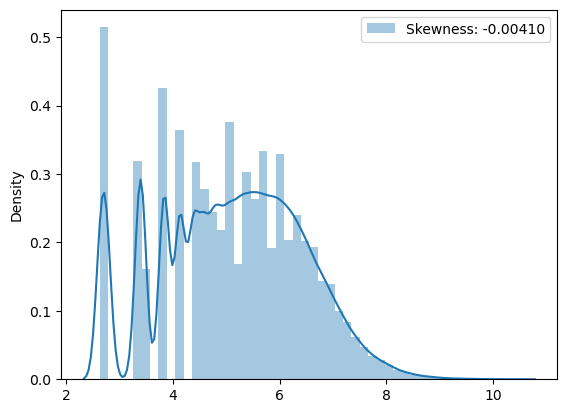

In [68]:
fitted_data, fitted_lambda = stats.boxcox(trainf['num_orders'])
t=sns.distplot(fitted_data,label="Skewness: %.5f"%(skew(fitted_data)))
t.legend()
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [69]:
trainf['num_orders']=fitted_data

In [70]:
scaler = StandardScaler()

scaler.fit(trainf[['num_orders']])
scaled = scaler.transform(trainf[['num_orders']])
#trainf['num_orders']=scaled

x_array = np.array([trainf['num_orders']])
normalized_arr = preprocessing.normalize(x_array,norm='l2')
#trainf['num_orders']=normalized_arr

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scale = minmax_scale.fit_transform(trainf[['num_orders']])
#trainf['num_orders']=x_scale

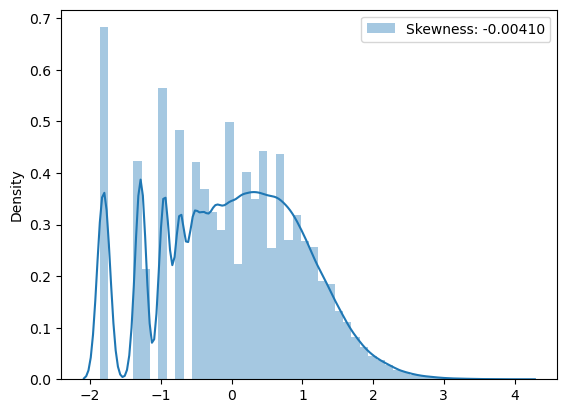

In [71]:
t=sns.distplot(scaled,label="Skewness: %.5f"%(skew(scaled)))
t.legend()

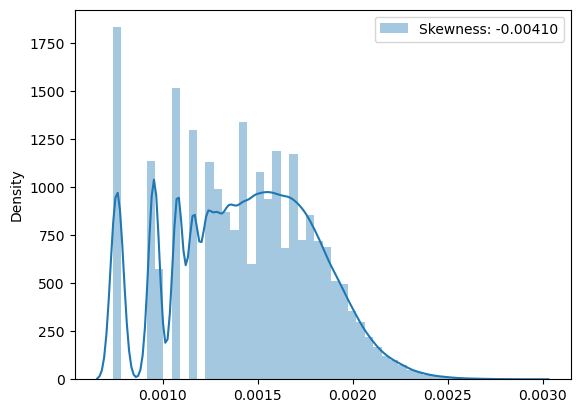

In [72]:
t=sns.distplot(normalized_arr[0],label="Skewness: %.5f"%(skew(normalized_arr[0])))
t.legend()

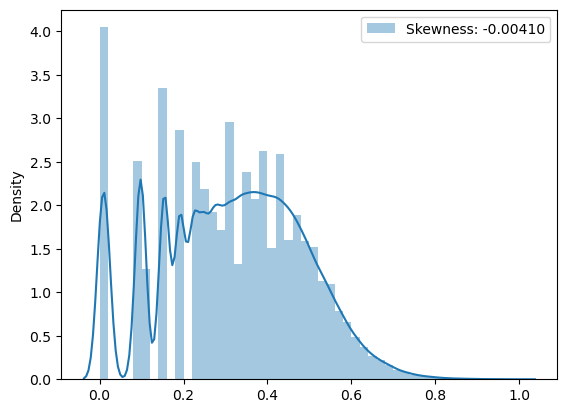

In [73]:
t=sns.distplot(x_scale,label="Skewness: %.5f"%(skew(x_scale)))
t.legend()

In [74]:
trainf['num_orders']=normalized_arr[0]

In [75]:
datasetf =  pd.concat(objs=[trainf, testf], axis=0,ignore_index=True)

In [76]:
#datasetf=total_data

In [77]:
datasetf['center_id']=datasetf['center_id'].astype('object')
datasetf['meal_id']=datasetf['meal_id'].astype('object')
datasetf['region_code']=datasetf['region_code'].astype('object')
datasetf['city_code']=datasetf['city_code'].astype('object')
datasetf['center_type']=datasetf['center_type'].astype('object')
datasetf['category']=datasetf['category'].astype('object')
datasetf['cuisine']=datasetf['cuisine'].astype('object')

In [78]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Iterate over column names
for column in datasetf:
    if datasetf[column].dtype.kind == 'O':
        datasetf[column]= label_encoder.fit_transform(datasetf[column])

In [79]:
datasetf=datasetf.sort_values(by=['week','meal_id',"center_id"], ascending=True)

In [80]:
trainx=datasetf[datasetf['week'].isin(range(1,146))]
testx=datasetf[datasetf['week'].isin(range(146,156))]

In [81]:
#trainx=trainx.dropna()
#testx['num_orders']=0
#testx=testx.dropna()

In [82]:
trainx.to_csv('Train1.csv')
testx.to_csv('Test1.csv')

In [84]:
t1 = pd.read_csv('Train1.csv')
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456547 entries, 0 to 456546
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 456547 non-null  int64  
 1   id                         456547 non-null  int64  
 2   week                       456547 non-null  int64  
 3   center_id                  456547 non-null  int64  
 4   meal_id                    456547 non-null  int64  
 5   checkout_price             456547 non-null  float64
 6   base_price                 456547 non-null  float64
 7   emailer_for_promotion      456547 non-null  int64  
 8   homepage_featured          456547 non-null  int64  
 9   num_orders                 456547 non-null  float64
 10  city_code                  456547 non-null  int64  
 11  region_code                456547 non-null  int64  
 12  center_type                456547 non-null  int64  
 13  op_area                    45

In [86]:
t1

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,...,cuisine,num_orders_lag_10,num_orders_lag_11,num_orders_lag_12,num_orders_lag_10_ewm_0.5,num_orders_lag_11_ewm_0.5,num_orders_lag_12_ewm_0.5,num_orders_lag_13_ewm_0.5,num_orders_lag_14_ewm_0.5,num_orders_lag_15_ewm_0.5
0,57738,1436842,1,0,0,-0.937119,-1.061248,0,0,0.002016,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57883,1057835,1,1,0,-0.891342,-1.043767,0,0,0.001990,...,2,NaN,NaN,NaN,1.786313,1.791435,1.815484,1.702107,1.673688,1.668726
2,58028,1217794,1,2,0,-0.883894,-0.984949,0,0,0.002061,...,2,NaN,NaN,NaN,1.474728,1.472715,1.369544,1.424308,1.364708,1.300017
3,58173,1439697,1,3,0,-0.906390,-1.043767,0,0,0.001635,...,2,NaN,NaN,NaN,1.798123,1.962897,1.860006,1.829431,1.846443,1.891784
4,58318,1431697,1,4,0,-0.891342,-1.043767,0,0,0.001652,...,2,NaN,NaN,NaN,0.657822,0.890954,0.811353,0.943663,0.811370,0.816035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456542,426976,1010385,145,67,50,1.321386,1.115750,0,0,0.001466,...,0,-0.098112,-0.391550,-0.158900,-0.083824,-0.041441,0.233439,0.556353,0.353555,0.590065
456543,426984,1238985,145,69,50,1.352071,1.065669,0,0,0.001160,...,0,NaN,NaN,NaN,-0.119773,-0.280419,0.013391,0.152539,0.229383,0.259578
456544,427065,1196873,145,70,50,1.606262,1.424476,0,0,0.000759,...,0,-0.679227,-0.623332,0.037684,-0.391899,-0.161874,0.168966,0.312660,0.326736,0.061588
456545,427148,1456282,145,71,50,1.321386,1.088095,0,0,0.001331,...,0,-0.883894,-0.108212,0.465906,-0.309853,0.023307,0.168341,-0.214505,-0.301002,-0.107640


In [85]:
t2 = pd.read_csv('Test1.csv')
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 32573 non-null  int64  
 1   id                         32573 non-null  int64  
 2   week                       32573 non-null  int64  
 3   center_id                  32573 non-null  int64  
 4   meal_id                    32573 non-null  int64  
 5   checkout_price             32573 non-null  float64
 6   base_price                 32573 non-null  float64
 7   emailer_for_promotion      32573 non-null  int64  
 8   homepage_featured          32573 non-null  int64  
 9   num_orders                 0 non-null      float64
 10  city_code                  32573 non-null  int64  
 11  region_code                32573 non-null  int64  
 12  center_type                32573 non-null  int64  
 13  op_area                    32573 non-null  flo